# Data Story

American National Football League draft combine results.  
Features collected on the athletic prowess of NFL players at an event to help promote early selection in the yearly NFL Draft

In [1]:
# Results captured from Stathead Football
# https://stathead.com/football/
# https://stathead.com/football/nfl-combine-results.cgi

In [57]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import plotly.express as px

In [151]:
# Load Data

# Splits Height and converts to inches
def calc_height_in(val):
    raw = val.split('/')
    h_ft = int(raw[0])
    h_in = int(raw[1])
    return float((h_ft * 12) + h_in)

# Get Team Function
def get_Team(draft_str):
    return draft_str.split('/')[0].strip()

# Get Round Function
def get_Round(draft_str):
    return draft_str.split('/')[1].strip()

# Get Round Function
def get_PickNum(draft_str):
    return draft_str.split('/')[2].strip()

# Get Round Function
def get_YearDraft(draft_str):
    return draft_str.split('/')[3].strip()

def OffenseDefense(pos_str):
    oPos = ['QB','OG','T','C','TE','OL','WR','RB','FB','P','K','LS']
    if pos_str in oPos:
        return 'O'
    else:
        return 'D'
    
def skill(pos_str):
    rcvr = ['TE','WR','RB','FB','P','K']
    spec = ['K','P','LS']
    line = ['OG','T','C','DL','DE','EDGE','OL','DT','OT']
    db = ['DB','FS','SS','S','NICK']
    lb = ['EDGE','ILB','OLB']
        
    if pos_str in rcvr:
        return 'Receiver'
    elif pos_str in spec:
        return 'Specialist'
    elif pos_str in line:
        return 'Lineman'
    elif pos_str in db:
        return 'Defensive Back'
    elif pos_str in lb:
        return 'Linebacker'
    elif pos_str == 'QB':
        return 'QB'
    else:
        return 'NA'
        
    

df_raw = pd.DataFrame()

for year in range(2001,2022):
    df = pd.read_csv('.//data//sportsref_download_' + str(year) + '.xls.csv',
                                  dtype={'Height':str,
                                         'Drafted (tm/rnd/yr)':str},
                         parse_dates=False)
    
    
    # Dropped unnamed COlumn
    df.drop(columns='Unnamed: 7',inplace=True,axis=1)
    
    # Make First and Last Name Columns
    df[['FirstName', 'LastName']] = df['Player'].str.split(' ', 1, expand=True)
    
    # Map to the 
    df['Height-in'] = df['Height'].map(calc_height_in)
    df.drop(columns=['Height'],axis=1,inplace=True)
    
    # Split Drafted
    df['Drafted (tm/rnd/yr)'].fillna('-/-/-/-',inplace=True) # Inserts dummy string so splitter works
    # Bet Team 
    df['DraftTeam'] = df['Drafted (tm/rnd/yr)'].map(get_Team)
    df['Round'] = df['Drafted (tm/rnd/yr)'].map(get_Round).str.extract('(\d+)') # Get Round
    df['Pick'] = df['Drafted (tm/rnd/yr)'].map(get_PickNum).str.extract('(\d+)') # Get Pick
    df['YearDraft'] = df['Drafted (tm/rnd/yr)'].map(get_YearDraft).str.extract('(\d+)') # Get Year
    df['OD'] = df['Pos'].map(OffenseDefense) # Get Year
    df['Skill'] = df['Pos'].map(skill) # Get Year
    
    
    # Adjust Team Names to avoid duplicates / Team Moves
    df['DraftTeam'] = df['DraftTeam'].str.replace('Washington Redskins','Washington Football Team')
    df['DraftTeam'] = df['DraftTeam'].str.replace('San Diego Chargers','SD/LA Chargers')
    df['DraftTeam'] = df['DraftTeam'].str.replace('Los Angeles Chargers','SD/LA Chargers')
    df['DraftTeam'] = df['DraftTeam'].str.replace('Oakland Raiders','LV/Oak Raiders')
    df['DraftTeam'] = df['DraftTeam'].str.replace('Las Vegas Raiders','LV/Oak Raiders')
    df['DraftTeam'] = df['DraftTeam'].str.replace('St. Louis Rams','LA/STL Rams')
    df['DraftTeam'] = df['DraftTeam'].str.replace('Los Angeles Rams','LA/STL Rams')
    df['DraftTeam'] = df['DraftTeam'].str.replace('Las Vegas Raiders','LV/Oak Raiders')
    
    df.drop(columns='Drafted (tm/rnd/yr)',inplace=True)
    
    df_raw = pd.concat([df_raw,df],ignore_index=True)
    
    df_raw.to_csv('Cleaned_results.csv')


<ipython-input-151-3a3b9fce86d9>:93: FutureWarning:

The default value of regex will change from True to False in a future version.



In [124]:
df_raw

,Rk,Year,Player,Pos,Age,AV,School,Wt,40YD,Vertical,...,Shuttle,FirstName,LastName,Height-in,DraftTeam,Round,Pick,YearDraft,OD,Skill
0,1,2001,Paul Zukauskas,OG,21.0,9.0,Boston Col.,307,5.30,NaN,...,NaN,Paul,Zukauskas,77.0,Cleveland Browns,7,203,2001,O,Lineman
1,2,2001,Ellis Wyms,DE,21.0,15.0,Mississippi State,285,4.97,28.0,...,4.47,Ellis,Wyms,75.0,Tampa Bay Buccaneers,6,183,2001,D,Lineman
2,3,2001,Shawn Worthen,DT,25.0,0.0,TCU,310,5.18,30.0,...,4.61,Shawn,Worthen,73.0,Minnesota Vikings,4,130,2001,D,Lineman
3,4,2001,Brandon Winey,OT,23.0,3.0,LSU,301,5.30,NaN,...,NaN,Brandon,Winey,78.0,Miami Dolphins,6,164,2001,D,Lineman
4,5,2001,Jamie Winborn,ILB,21.0,21.0,Vanderbilt,229,4.63,35.5,...,NaN,Jamie,Winborn,71.0,San Francisco 49ers,2,47,2001,D,Linebacker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,196,2021,Will Fries,OL,22.0,NaN,Penn St.,309,5.37,31.0,...,4.53,Will,Fries,78.0,Indianapolis Colts,7,248,2021,O,Lineman
4196,197,2021,Pat Freiermuth,TE,22.0,NaN,Penn St.,251,NaN,NaN,...,NaN,Pat,Freiermuth,77.0,Pittsburgh Steelers,2,55,2021,O,Receiver
4197,198,2021,Feleipe Franks,QB,23.0,NaN,Arkansas,234,4.61,32.5,...,4.22,Feleipe,Franks,78.0,-,NaN,NaN,NaN,O,QB
4198,199,2021,Stone Forsythe,OL,23.0,NaN,Florida,307,5.14,27.5,...,4.65,Stone,Forsythe,80.0,Seattle Seahawks,6,208,2021,O,Lineman


In [142]:
df_raw[df_raw['Skill'] == 'QB'].groupby(by=['Year','Skill'])['40YD','Wt','Height-in'].mean()

<ipython-input-142-5fa6a9bb8818>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,,40YD,Wt,Height-in
Year,Skill,,,
2001,QB,4.810833,221.583333,74.333333
2002,QB,4.819000,223.300000,74.500000
2003,QB,4.841250,224.750000,74.875000
2004,QB,4.914000,232.733333,75.400000
2005,QB,4.823333,225.777778,75.666667
2006,QB,4.647778,218.666667,75.000000
2007,QB,4.814545,228.818182,75.454545
2008,QB,4.751250,223.375000,75.875000
2009,QB,4.829000,221.900000,74.500000


In [150]:
df_raw[df_raw['Skill'] == 'Defensive Back'].sort_values(by=['40YD'])

,Rk,Year,Player,Pos,Age,AV,School,Wt,40YD,Vertical,...,Shuttle,FirstName,LastName,Height-in,DraftTeam,Round,Pick,YearDraft,OD,Skill
3604,5,2019,Zedrick Woods,S,NaN,NaN,Mississippi,205,4.29,34.5,...,4.15,Zedrick,Woods,71.0,-,NaN,NaN,NaN,D,Defensive Back
4052,53,2021,Eric Stokes,DB,22.0,NaN,Georgia,194,4.31,38.5,...,4.36,Eric,Stokes,73.0,Green Bay Packers,1,29,2021,D,Defensive Back
1928,129,2010,Taylor Mays,S,22.0,10.0,USC,230,4.31,41.0,...,NaN,Taylor,Mays,75.0,San Francisco 49ers,2,49,2010,D,Defensive Back
1158,159,2006,Michael Huff,S,23.0,38.0,Texas,204,4.34,40.5,...,NaN,Michael,Huff,73.0,LV/Oak Raiders,1,7,2006,D,Defensive Back
4143,144,2021,Kelvin Joseph,DB,20.0,NaN,Kentucky,197,4.34,35.0,...,4.22,Kelvin,Joseph,71.0,Dallas Cowboys,2,44,2021,D,Defensive Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,41,2019,Marvell Tell,S,22.0,1.0,USC,198,NaN,42.0,...,4.01,Marvell,Tell,74.0,Indianapolis Colts,5,144,2019,D,Defensive Back
3685,86,2019,Taylor Rapp,S,21.0,9.0,Washington,208,NaN,35.0,...,3.99,Taylor,Rapp,73.0,LA/STL Rams,2,61,2019,D,Defensive Back
3963,164,2020,Brandon Jones,S,21.0,2.0,Texas,198,NaN,NaN,...,NaN,Brandon,Jones,71.0,Miami Dolphins,3,70,2020,D,Defensive Back
4113,114,2021,Hamsah Nasirildeen,DB,22.0,NaN,Florida St.,215,NaN,32.0,...,4.31,Hamsah,Nasirildeen,75.0,New York Jets,6,186,2021,D,Defensive Back


In [143]:
df_raw[df_raw['Skill'] == 'D'].groupby(by=['Year'])['40YD','Wt','Height-in'].mean()

<ipython-input-143-529a48e64c90>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,40YD,Wt,Height-in
Year,,,


In [133]:
df_raw.groupby(by=['DraftTeam','Year','OD','Skill'])['DraftTeam'].count()

DraftTeam                 Year  OD  Skill         
-                         2001  D   Defensive Back    2
                                    Lineman           5
                                    NA                3
                                O   Lineman           4
                                    QB                4
                                                     ..
Washington Football Team  2020  D   Lineman           2
                                    NA                1
                                O   Lineman           1
                          2021  D   Defensive Back    2
                                    Lineman           1
Name: DraftTeam, Length: 2456, dtype: int64

In [121]:
df_raw[df_raw['DraftTeam'] == 'Dallas Cowboys']

,Rk,Year,Player,Pos,Age,AV,School,Wt,40YD,Vertical,...,Drafted (tm/rnd/yr),FirstName,LastName,Height-in,DraftTeam,Round,Pick,YearDraft,OD,Skill
38,39,2001,Daleroy Stewart,DT,22.0,3.0,Southern Miss,309,4.90,33.0,...,Dallas Cowboys / 6th / 171st pick / 2001,Daleroy,Stewart,75.0,Dallas Cowboys,6,171,2001,D,Lineman
40,41,2001,Markus Steele,OLB,21.0,8.0,USC,232,4.62,33.0,...,Dallas Cowboys / 4th / 122nd pick / 2001,Markus,Steele,75.0,Dallas Cowboys,4,122,2001,D,Linebacker
119,120,2001,Matt Lehr,OG,21.0,25.0,Virginia Tech,290,5.28,31.5,...,Dallas Cowboys / 5th / 137th pick / 2001,Matt,Lehr,74.0,Dallas Cowboys,5,137,2001,O,Lineman
183,184,2001,Char-Ron Dorsey,OT,23.0,1.0,Florida State,348,5.99,NaN,...,Dallas Cowboys / 7th / 242nd pick / 2001,Char-Ron,Dorsey,78.0,Dallas Cowboys,7,242,2001,D,Lineman
185,186,2001,Tony Dixon,S,21.0,9.0,Alabama,213,4.63,37.0,...,Dallas Cowboys / 2nd / 56th pick / 2001,Tony,Dixon,73.0,Dallas Cowboys,2,56,2001,D,Defensive Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,153,2020,CeeDee Lamb,WR,20.0,8.0,Oklahoma,198,4.50,34.5,...,Dallas Cowboys / 1st / 17th pick / 2020,CeeDee,Lamb,74.0,Dallas Cowboys,1,17,2020,O,Receiver
4002,3,2021,Nahshon Wright,DB,22.0,NaN,Oregon St.,183,4.46,31.0,...,Dallas Cowboys / 3rd / 99th pick / 2021,Nahshon,Wright,76.0,Dallas Cowboys,3,99,2021,D,Defensive Back
4096,97,2021,Micah Parsons,LB,21.0,NaN,Penn St.,246,4.39,34.0,...,Dallas Cowboys / 1st / 12th pick / 2021,Micah,Parsons,75.0,Dallas Cowboys,1,12,2021,D,QB
4143,144,2021,Kelvin Joseph,DB,20.0,NaN,Kentucky,197,4.34,35.0,...,Dallas Cowboys / 2nd / 44th pick / 2021,Kelvin,Joseph,71.0,Dallas Cowboys,2,44,2021,D,Defensive Back


In [101]:
# Aggregations

df_raw.groupby('Pos').count()

,Rk,Year,Player,Age,AV,School,Wt,40YD,Vertical,BenchReps,...,3Cone,Shuttle,Drafted (tm/rnd/yr),FirstName,LastName,Height-in,DraftTeam,Round,Pick,YearDraft
Pos,,,,,,,,,,,,,,,,,,,,,
C,102,102,102,99,94,102,102,96,75,83,...,74,74,102,102,102,102,102,83,83,83
CB,436,436,436,423,390,436,436,426,362,348,...,277,287,436,436,436,436,436,359,359,359
DB,29,29,29,28,2,29,29,26,28,26,...,23,24,29,29,29,29,29,23,23,23
DE,304,304,304,287,260,304,304,298,243,241,...,208,212,304,304,304,304,304,252,252,252
DL,66,66,66,64,41,66,66,54,53,51,...,40,39,66,66,66,66,66,52,52,52
DT,302,302,302,293,269,302,302,295,230,233,...,198,203,302,302,302,302,302,250,250,250
EDGE,26,26,26,25,23,26,26,21,22,18,...,15,17,26,26,26,26,26,22,22,22
FB,71,71,71,69,62,71,71,71,60,59,...,52,52,71,71,71,71,71,46,46,46
ILB,171,171,171,166,157,171,171,168,136,134,...,102,109,171,171,171,171,171,130,130,130


In [98]:
# Joyplot of some feature over 20 years of draft by position

In [ ]:
# Animation of Bubbles of progression of features by year

In [ ]:
# Distribution of Position

array([[<AxesSubplot:title={'center':'Wt'}>]], dtype=object)

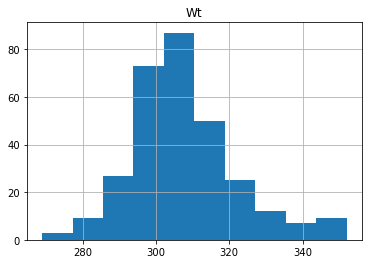

In [55]:
df_raw[df_raw['Pos'] == 'DT'].hist('Wt')

In [ ]:
# Change in size of interior linemen

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df_subset_DT = df_raw[df_raw['Pos'] == 'DT']
# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
# df = pd.DataFrame(dict(x=x, g=g))
m = df_raw.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [ ]:
# Hans Roesling Bubble Chart

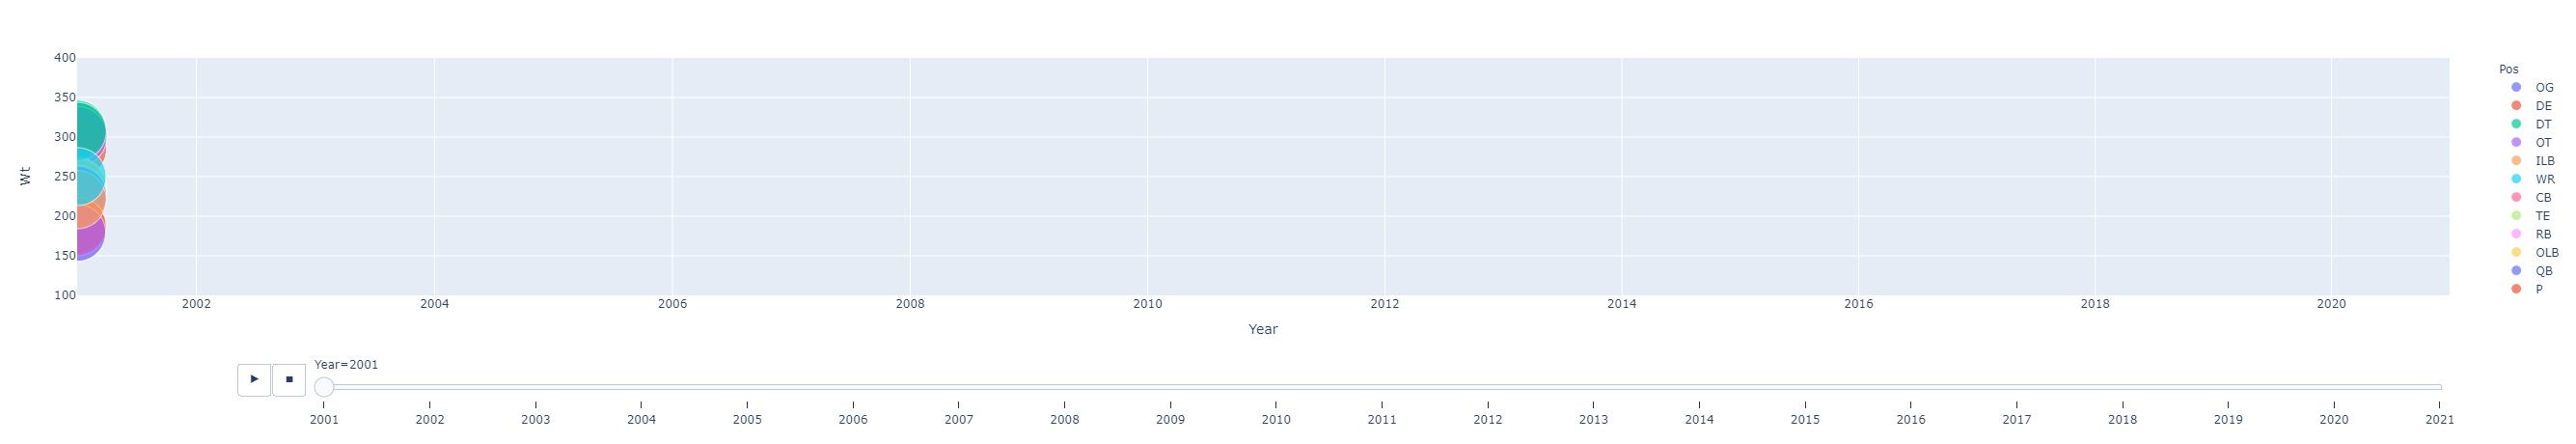

In [78]:

fig = px.scatter(df_raw,x='Year', y='Wt',animation_frame='Year', 
     animation_group='Pos',size='Height-in', 
     color='Pos',
     hover_name='Pos', log_x=True, 
     size_max=45,range_x=[2001,2021], range_y=[100,400]
 )
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 700
fig.show()